In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from itertools import combinations
from collections import Counter
filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [32]:
df = pd.read_csv("liver_cirrhosis.csv")

In [33]:
# Column descriptions:
# N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
# Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
# Drug: type of drug D-penicillamine or placebo
# Age: age in days
# Sex: M (male) or F (female)
# Ascites: presence of ascites N (No) or Y (Yes)
# Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
# Spiders: presence of spiders N (No) or Y (Yes)
# Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# Bilirubin: serum bilirubin in [mg/dl]
# Cholesterol: serum cholesterol in [mg/dl]
# Albumin: albumin in [gm/dl]
# Copper: urine copper in [ug/day]
# Alk_Phos: alkaline phosphatase in [U/liter]
# SGOT: SGOT in [U/ml]
# Tryglicerides: triglicerides in [mg/dl]
# Platelets: platelets per cubic [ml/1000]
# Prothrombin: prothrombin time in seconds [s]
# Stage: histologic stage of disease ( 1, 2, or 3 )

In [34]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [35]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [36]:
df['Edema'].value_counts()

Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

In [37]:
# Missing Values
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [38]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [39]:
df.shape

(25000, 19)

In [40]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 15361


In [41]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
num_rows_after_removal = df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

Number of rows after removing duplicates: 9639


In [42]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000
mean,1910.982571,18429.717606,3.228571,371.706706,3.496118,97.027569,1973.572709,122.317487,123.587337,253.787605,10.713328,2.029152
std,1093.620373,3693.953156,4.512278,197.824339,0.382319,73.108854,1827.063380,47.653515,55.206301,95.740700,0.922026,0.809956
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1103.000000,15628.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,1.000000
50%,1690.000000,18628.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,2.000000
75%,2598.000000,20819.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,3.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


In [43]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [44]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})
df["Stage"] = df["Stage"].map({1:0, 2:1, 3:2})

In [45]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)




In [46]:
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


In [47]:
x_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
12977,673,2,0,12557,0,0,0,0,0,3.4,271.000000,3.63,464.000000,1376.000000,120.900000,55.000000,322.00000,11.6
884,2504,0,0,15730,0,0,1,1,0,0.5,120.000000,3.61,53.000000,804.000000,110.050000,52.000000,275.00000,10.6
2490,3492,0,1,18806,0,0,0,0,0,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,271.00000,10.6
1346,2255,0,1,22642,0,0,0,0,0,0.6,369.510563,4.07,161.000000,674.000000,26.350000,124.702128,240.00000,11.0
8852,186,2,0,16802,0,1,0,1,0,3.2,260.000000,3.19,91.000000,815.000000,127.100000,101.000000,219.00000,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,1427,2,1,19567,0,0,1,0,1,7.2,1015.000000,3.26,247.000000,3836.000000,198.400000,280.000000,216.00000,12.4
19856,2363,0,1,20834,0,0,1,1,0,1.4,226.000000,3.36,13.000000,810.000000,72.850000,62.000000,117.00000,11.6
8796,1030,0,0,20955,0,0,0,0,0,1.1,290.000000,3.99,38.000000,2120.000000,186.000000,146.000000,422.00000,9.6
5365,2812,2,0,20454,0,1,0,1,0,3.4,369.510563,3.92,97.648387,1982.655769,122.556346,124.702128,257.02457,10.6


In [48]:
y_train

12977    2
884      1
2490     0
1346     0
8852     2
        ..
16294    1
19856    2
8796     2
5365     2
4327     2
Name: Stage, Length: 7711, dtype: int64

In [49]:
categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly",
               "Spiders", "Edema"]

In [50]:
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


ML Models

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import preprocessing
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion,Pipeline,make_pipeline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

With Standardizing

XGBoost

In [52]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

y_train_adjusted = np.array(y_train)
y_test_adjusted = np.array(y_test)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3)  # Specify number of classes

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the train set
y_pred_train = best_xgb_model.predict(x_train)

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the train set
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
train_conf_matrix = confusion_matrix(y_train_adjusted, y_pred_train)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)
test_conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
classification_report_result = classification_report(y_test_adjusted, y_pred_test)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report_result)

print("\nConfusion Matrix (Train Set):")
print(train_conf_matrix)

print("\nConfusion Matrix (Test Set):")
print(test_conf_matrix)


Train Accuracy: 0.9907
Test Accuracy: 0.9108

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       599
           1       0.89      0.90      0.90       678
           2       0.94      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928


Confusion Matrix (Train Set):
[[2387   34    5]
 [  20 2604    6]
 [   2    5 2648]]

Confusion Matrix (Test Set):
[[533  52  14]
 [ 42 611  25]
 [ 19  20 612]]


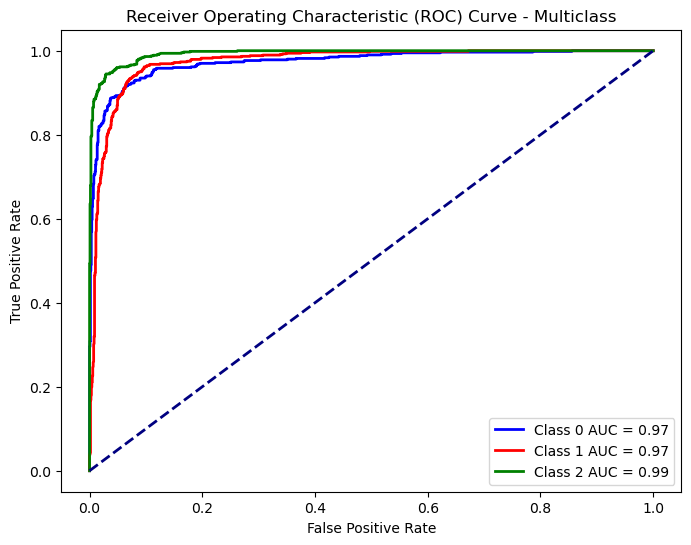

Macro-average AUC: 0.98
Micro-average AUC: 0.98


In [53]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming `best_xgb_model` is your trained model, and `x_test`, `y_test_adjusted` are your test data

# Binarize the output labels for multiclass
y_test_binarized = label_binarize(y_test_adjusted, classes=[0, 1, 2])  # Adjust classes according to your dataset
n_classes = y_test_binarized.shape[1]

# Compute the predicted probabilities for each class
y_pred_proba = best_xgb_model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust the colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

# Optionally, calculate the macro and micro average ROC AUC
# Macro-average ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Micro-average ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Macro-average AUC: {roc_auc['macro']:.2f}")
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


Applying Feature Importance

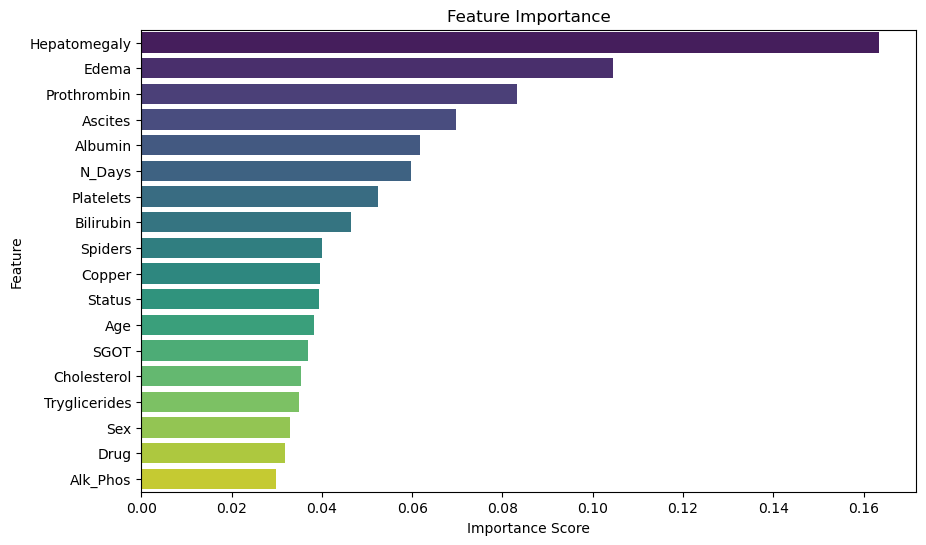

In [54]:
# Get feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Removing least important variables and Fitting XGB

Alk_Phos

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation, excluding the 'Alk_Phos' column
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['Alk_Phos']), y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set, excluding the 'Alk_Phos' column
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['Alk_Phos']))

# Make predictions on the training set, excluding the 'Alk_Phos' column
y_pred_train = best_xgb_model.predict(x_train.drop(columns=['Alk_Phos']))

# Calculate accuracies
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)

# Generate the classification report and confusion matrix for the test set
classification_report_result = classification_report(y_test_adjusted, y_pred_test)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
conf_matrix_train = confusion_matrix(y_train_adjusted, y_pred_train)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test Set):")
print(classification_report_result)

# Optionally, print the confusion matrices
print("Confusion Matrix (Test Set):")
print(conf_matrix)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)


Train Accuracy: 0.9908
Test Accuracy: 0.9129
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       599
           1       0.90      0.90      0.90       678
           2       0.93      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928

Confusion Matrix (Test Set):
[[536  48  15]
 [ 39 610  29]
 [ 16  21 614]]
Confusion Matrix (Training Set):
[[2385   36    5]
 [  17 2608    5]
 [   2    6 2647]]


Alk_Phos AND Drug


In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation, excluding the 'Alk_Phos' column
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['Alk_Phos',"Drug"]), y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set, excluding the 'Alk_Phos' column
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['Alk_Phos',"Drug"]))

# Make predictions on the training set, excluding the 'Alk_Phos' column
y_pred_train = best_xgb_model.predict(x_train.drop(columns=['Alk_Phos',"Drug"]))

# Calculate accuracies
train_accuracy = accuracy_score(y_train_adjusted, y_pred_train)
test_accuracy = accuracy_score(y_test_adjusted, y_pred_test)

# Generate the classification report and confusion matrix for the test set
classification_report_result = classification_report(y_test_adjusted, y_pred_test)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_test)
conf_matrix_train = confusion_matrix(y_train_adjusted, y_pred_train)

# Print the results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Classification Report (Test Set):")
print(classification_report_result)

# Optionally, print the confusion matrices
print("Confusion Matrix (Test Set):")
print(conf_matrix)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)


Train Accuracy: 0.9828
Test Accuracy: 0.9098
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       599
           1       0.90      0.90      0.90       678
           2       0.93      0.94      0.94       651

    accuracy                           0.91      1928
   macro avg       0.91      0.91      0.91      1928
weighted avg       0.91      0.91      0.91      1928

Confusion Matrix (Test Set):
[[535  49  15]
 [ 41 608  29]
 [ 18  22 611]]
Confusion Matrix (Training Set):
[[2353   64    9]
 [  33 2589    8]
 [   4   15 2636]]


In [57]:
### Create a Pickle file using seralization
import pickle
pickle_out = open("best_xgb_model.pkl","wb")
pickle.dump(best_xgb_model,pickle_out)
pickle_out.close()